## Introduction

Climate change, which was proposed at the begining of the 21th century, keeps being a hot topic in the world. It not only influences the ecosystems dramatically, but also affects the human society and property such as the National Parks. Although the National Parks are protected by the government, they are still facing the threat of water and soil erosion. In this project, we are going to monitor the changes of the soils water 

## Data Overview

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import plotly.io as pio
from IPython.display import IFrame
import warnings
warnings.filterwarnings("ignore")


hist = pd.read_csv('data/NABR_historic.csv')
nt = pd.read_csv('data/nearterm_data_2020-2024.csv')
hist.drop_duplicates(keep='first', inplace=True)
nt.drop_duplicates(keep='first', inplace=True)

hist

,long,lat,year,TimePeriod,RCP,scenario,treecanopy,Ann_Herb,Bare,Herb,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
0,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
1,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
2,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
3,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
4,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-12.45,0.113447,0.096831,0.041876,0.052298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13816,-109.9659,37.62525,2014,Hist,historical,sc1,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-18.25,0.208796,0.177372,0.089736,0.109121
13817,-109.9659,37.62525,2015,Hist,historical,sc1,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-15.75,0.130762,0.141327,0.091233,0.117626
13818,-109.9659,37.62525,2016,Hist,historical,sc1,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-17.45,0.155276,0.165946,0.088240,0.089620
13819,-109.9659,37.62525,2017,Hist,historical,sc1,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-15.55,0.135309,0.142626,0.086499,0.088082


In [2]:
nt

,long,lat,year,TimePeriod,RCP,scenario,treecanopy,Ann_Herb,Bare,Herb,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
0,-110.0472,37.60413,2021,NT,4.5,sc22,0,0,84,5,...,6.37,1.630333,24.50402,24.50402,36.89,NaN,NaN,NaN,NaN,NaN
1,-110.0472,37.60413,2021,NT,4.5,sc22,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-12.77,0.114652,0.078764,0.043514,0.051281
2,-110.0472,37.60413,2021,NT,4.5,sc23,0,0,84,5,...,3.09,1.389056,24.11043,24.11043,37.95,NaN,NaN,NaN,NaN,NaN
3,-110.0472,37.60413,2021,NT,4.5,sc23,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-18.96,0.130221,0.096412,0.041232,0.092241
4,-110.0472,37.60413,2021,NT,4.5,sc24,0,0,84,5,...,6.87,-0.334389,25.54266,10.31321,37.74,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55797,-109.9659,37.62525,2024,NT,8.5,sc57,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-12.16,0.142255,0.173792,0.091433,0.106907
55798,-109.9659,37.62525,2024,NT,8.5,sc58,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-12.16,0.166254,0.158146,0.086355,0.095905
55799,-109.9659,37.62525,2024,NT,8.5,sc59,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-10.38,0.151342,0.175814,0.091992,0.109333
55800,-109.9659,37.62525,2024,NT,8.5,sc60,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-10.61,0.122249,0.104884,0.087115,0.118908


# Historical Environment Conditions 

## Plants Coverage Area


In [3]:
# The plant coverage depends on the bare ground percentage coverage
hist['coverage_degree'] = 100 - hist['Bare']
coverage_degree = hist.groupby(['long','lat','year'])['coverage_degree'].mean().reset_index()
coverage_degree

,long,lat,year,coverage_degree
0,-110.0472,37.60413,1980,16.0
1,-110.0472,37.60413,1981,16.0
2,-110.0472,37.60413,1982,16.0
3,-110.0472,37.60413,1983,16.0
4,-110.0472,37.60413,1984,16.0
...,...,...,...,...
4402,-109.9659,37.62525,2014,63.0
4403,-109.9659,37.62525,2015,63.0
4404,-109.9659,37.62525,2016,63.0
4405,-109.9659,37.62525,2017,63.0


In [4]:
# Citation: https://plotly.com/python/mapbox-layers/

fig1 = px.scatter_mapbox(coverage_degree, 
                     lat='lat', 
                     lon='long', 
                     color='coverage_degree', 
                     size='coverage_degree',
                     animation_frame='year',
                     title='Covered Soil Percentage Over Time',
                     labels={'coverage_degree': 'Coverage (%)'},
                     color_continuous_scale='RdYlGn')

fig1.update_layout(mapbox_style="open-street-map",
                   width = 800, height = 700,
                   mapbox = dict(zoom = 11.8),
                   title = dict(x = 0.5, xanchor = 'center', font = dict(size = 18)))

pio.write_html(fig1, file='forest_degree.html', auto_open=False)

<iframe src ="forest_degree.html" width="120%" height="600px"></iframe>

In [5]:
plants = hist.groupby(['long','lat','year'])[['treecanopy','Herb','Litter','Shrub','Ann_Herb']].mean().reset_index()
plants['plant_coverage'] = plants['treecanopy'] + plants['Herb'] + plants['Litter'] + plants['Shrub'] + plants['Ann_Herb']

fig2 = px.scatter_mapbox(plants,
                        lat='lat',
                        lon='long',
                        color='plant_coverage',
                        size='plant_coverage',
                        animation_frame='year',
                        title='Plants Coverage Over Time',
                        labels={'plant_coverage': 'Plants Coverage (%)'},
                        color_continuous_scale='Greens')

fig2.update_layout(mapbox_style="open-street-map",
                     width = 800, height = 700,
                     mapbox = dict(zoom = 11.8),
                     title = dict(x = 0.5, xanchor = 'center', font = dict(size = 18)))

pio.write_html(fig2, file='plants_coverage.html', auto_open=False)

<iframe src ="plants_coverage.html" width="120%" height="600px"></iframe>

In [6]:
# Citation: https://plotly.com/python/mapbox-county-choropleth/


app = Dash(__name__)

app.layout = html.Div([
    html.H4('Plants Category Coverage Over Time'),
    html.P("Select a plant:"),
    dcc.RadioItems(
        id='candidate', 
        options=[
            {"label": "Tree Canopy", "value": "treecanopy"}, 
            {"label": "Herb", "value": "Herb"}, 
            {"label": "Litter", "value": "Litter"}, 
            {"label": "Shrub", "value": "Shrub"}, 
            {"label": "Ann_Herb", "value": "Ann_Herb"}
        ],
        value="treecanopy",
        inline=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input("candidate", "value"))
def update_figure(candidate):
    fig = px.scatter_mapbox(
        plants, 
        lat="lat", 
        lon="long", 
        color=candidate,
        size=candidate,
        animation_frame="year",
        title='Different Plants Coverage Over Time',
        labels={candidate: 'Coverage Degree(%)'},
        color_continuous_scale='Greens')


    fig.update_layout(mapbox_style="open-street-map",
                   width = 800, height = 700,
                   mapbox = dict(zoom = 11.5),
                   title = dict(x = 0.5, xanchor = 'center', font = dict(size = 18)))

    return fig


app.run_server(debug=True)

## Drought Condition


In [7]:
# The drought term was defined by the dry soil dats, evaporation and extreme short term dry stress in summer
# Elminate the missing values and get the unified drought value

drought_severty = hist.groupby(['long', 'lat', 'year'])[['ExtremeShortTermDryStress_Summer_whole', 'Evap_Summer', 'NonDrySWA_Summer_whole']].mean().reset_index()
drought_severty.fillna(0, inplace=True)
drought_severty

,long,lat,year,ExtremeShortTermDryStress_Summer_whole,Evap_Summer,NonDrySWA_Summer_whole
0,-110.0472,37.60413,1980,36.16,1.559807,0.032114
1,-110.0472,37.60413,1981,36.08,5.042878,0.033663
2,-110.0472,37.60413,1982,34.99,4.527636,0.199382
3,-110.0472,37.60413,1983,33.69,5.169576,0.096044
4,-110.0472,37.60413,1984,34.01,5.230332,0.045278
...,...,...,...,...,...,...
4402,-109.9659,37.62525,2014,33.73,3.706696,0.389360
4403,-109.9659,37.62525,2015,34.27,5.533297,0.493629
4404,-109.9659,37.62525,2016,35.26,3.927186,0.263077
4405,-109.9659,37.62525,2017,35.29,3.294263,0.126709


<Figure size 1500x1000 with 0 Axes>

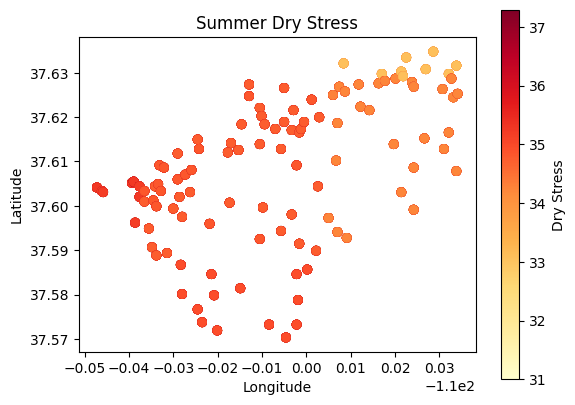

In [8]:
gdf = gpd.GeoDataFrame(hist, geometry=gpd.points_from_xy(hist.long, hist.lat))

# Plot the data
plt.figure(figsize=(15, 10))
gdf.plot(column='ExtremeShortTermDryStress_Summer_whole', legend=True, cmap='YlOrRd', legend_kwds={'label': "Dry Stress", 'orientation': "vertical"})

# Customize the plot
plt.title('Summer Dry Stress')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [9]:
figure4 = px.scatter_mapbox(drought_severty,
                            lat='lat',
                            lon='long',
                            color='ExtremeShortTermDryStress_Summer_whole',
                            size='ExtremeShortTermDryStress_Summer_whole',
                            animation_frame='year',
                            title='Summer Drought Severity Over Time',
                            labels={'ExtremeShortTermDryStress_Summer_whole': 'Drought Severity (Days)'},
                            color_continuous_scale='YlOrRd')

figure4.update_layout(mapbox_style="open-street-map",
                        width = 800, height = 700,
                        mapbox = dict(zoom = 11.8),
                        title = dict(x = 0.5, xanchor = 'center', font = dict(size = 18)))

pio.write_html(figure4, file='drought_severity.html', auto_open=False)

<iframe src ="drought_severity.html" width="120%" height="600px"></iframe>

In [10]:
figure5 = px.scatter_mapbox(drought_severty,
                            lat='lat',
                            lon='long',
                            color='Evap_Summer',
                            size='Evap_Summer',
                            animation_frame='year',
                            title='Summer Evaporation Over Time',
                            labels={'Evap_Summer': 'Evaporation'},
                            color_continuous_scale='Reds')

figure5.update_layout(mapbox_style="open-street-map",
                        width = 800, height = 700,
                        mapbox = dict(zoom = 11.8),
                        title = dict(x = 0.5, xanchor = 'center', font = dict(size = 18)))

pio.write_html(figure5, file='summer_evaporation.html', auto_open=False)

<iframe src ="summer_evaporation.html" width="120%" height="600px"></iframe>

In [11]:
figure6 = px.scatter_mapbox(drought_severty,
                        lat='lat',
                        lon='long',
                        color='NonDrySWA_Summer_whole',
                        animation_frame='year',
                        title='Summer Non-Dry Soil Water Availability Over Time',
                        labels={'NonDrySWA_Summer_whole': 'Water Availability'},
                        color_continuous_scale='RdYlBu')

figure6.update_layout(mapbox_style="open-street-map",
                        width = 800, height = 700,
                        mapbox = dict(zoom = 11.8),
                        title = dict(x = 0.5, xanchor = 'center', font = dict(size = 18)))

pio.write_html(figure6, file='summer_NonDrySWA.html', auto_open=False)

<iframe src ="summer_NonDrySWA.html" width="120%" height="600px"></iframe>

## Percipitation and Temperature


In [12]:
ppt = hist.groupby(['long', 'lat', 'year'])[['PPT_Summer', 'T_Summer', 'PPT_Winter', 'T_Winter', 'FrostDays_Winter']].mean().reset_index()
ppt

,long,lat,year,PPT_Summer,T_Summer,PPT_Winter,T_Winter,FrostDays_Winter
0,-110.0472,37.60413,1980,2.69,23.15924,13.79,0.964835,75.0
1,-110.0472,37.60413,1981,9.39,23.27065,2.25,3.334444,79.0
2,-110.0472,37.60413,1982,9.50,22.05707,4.12,-0.015556,83.0
3,-110.0472,37.60413,1983,10.22,21.32826,7.09,0.409444,85.0
4,-110.0472,37.60413,1984,9.49,21.95978,4.77,-1.047253,91.0
...,...,...,...,...,...,...,...,...
4402,-109.9659,37.62525,2014,7.61,21.09674,4.16,0.201111,75.0
4403,-109.9659,37.62525,2015,13.84,21.40380,7.44,1.335000,67.0
4404,-109.9659,37.62525,2016,8.00,22.76848,7.20,-1.556593,80.0
4405,-109.9659,37.62525,2017,7.12,23.27337,9.97,0.617778,68.0


### Summer 


In [13]:
figure7 = px.scatter_mapbox(ppt,
                        lat='lat',
                        lon='long',
                        color='PPT_Summer',
                        size='PPT_Summer',
                        animation_frame='year',
                        title='Summer Precipitation Over Time',
                        labels={'PPT_Summer': 'Precipitation (mm)'},
                        color_continuous_scale='Blues')

figure7.update_layout(mapbox_style="open-street-map",                      
                        width = 800, height = 700,
                        mapbox = dict(zoom = 11.8),
                        title = dict(x = 0.5, xanchor = 'center', font = dict(size = 18)))

pio.write_html(figure7, file='summer_precipitation.html', auto_open=False)

<iframe src ="summer_precipitation.html" width="120%" height="600px"></iframe>

In [14]:
figure8 = px.scatter_mapbox(ppt,
                        lat='lat',
                        lon='long',
                        color='T_Summer',
                        animation_frame='year',
                        title='Summer Temperature Over Time',
                        labels={'T_Summer': 'Temperature (°C)'},
                        color_continuous_scale='ylorrd')

figure8.update_layout(mapbox_style="open-street-map",
                        width = 800, height = 700,
                        mapbox = dict(zoom = 11.8),
                        title = dict(x = 0.5, xanchor = 'center', font = dict(size = 20)))

pio.write_html(figure8, file='summer_temperature.html', auto_open=False)

<iframe src ="summer_temperature.html" width="120%" height="600px"></iframe>

### Winter


In [15]:
figure9 = px.scatter_mapbox(ppt,
                        lat='lat',
                        lon='long',
                        color='PPT_Winter',
                        size='PPT_Winter',
                        animation_frame='year',
                        title='Winter Precipitation Over Time',
                        labels={'PPT_Winter': 'Precipitation (mm)'},
                        color_continuous_scale='Blues')

figure9.update_layout(mapbox_style="open-street-map",
                        width = 800, height = 700,
                        mapbox = dict(zoom = 11.8),
                        title = dict(x = 0.5, xanchor = 'center', font = dict(size = 18)))

pio.write_html(figure9, file='winter_precipitation.html', auto_open=False)

<iframe src ="winter_precipitation.html" width="120%" height="600px"></iframe>

In [16]:
figure10 = px.scatter_mapbox(ppt,
                        lat='lat',
                        lon='long',
                        color='T_Winter',
                        animation_frame='year',
                        title='Winter Temperature Over Time',
                        labels={'T_Winter': 'Temperature (°C)'},
                        color_continuous_scale='YlGnBu_r')

figure10.update_layout(mapbox_style="open-street-map",                      
                        width = 800, height = 700,
                        mapbox = dict(zoom = 11.8),
                        title = dict(x = 0.5, xanchor = 'center', font = dict(size = 18)))

pio.write_html(figure10, file='winter_temperature.html', auto_open=False)

<iframe src ="winter_temperature.html" width="120%" height="600px"></iframe>

In [17]:
figure11 = px.scatter_mapbox(ppt,
                        lat='lat',
                        lon='long',
                        color='FrostDays_Winter',
                        size='FrostDays_Winter',
                        animation_frame='year',
                        title='Winter Frost Days Over Time',
                        labels={'FrostDays_Winter': 'Frost Days'},
                        color_continuous_scale='Blues')

figure11.update_layout(mapbox_style="open-street-map",
                        width = 800, height = 700,
                        mapbox = dict(zoom = 11.8),
                        title = dict(x = 0.5, xanchor = 'center', font = dict(size = 18)))


pio.write_html(figure11, file='winter_frost_days.html', auto_open=False)

<iframe src ="winter_frost_days.html" width="120%" height="600px"></iframe>

## Water Capacity in Soil


In [18]:
vwc = hist.groupby(['long', 'lat', 'year'])[['VWC_Spring_whole', 'VWC_Summer_whole', 'VWC_Fall_whole', 'VWC_Winter_whole']].mean().reset_index()
vwc['vwc_total'] = vwc['VWC_Spring_whole'] + vwc['VWC_Summer_whole'] + vwc['VWC_Fall_whole'] + vwc['VWC_Winter_whole']
vwc

,long,lat,year,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole,VWC_Winter_whole,vwc_total
0,-110.0472,37.60413,1980,0.096831,0.041876,0.052298,0.113447,0.304451
1,-110.0472,37.60413,1981,0.060727,0.042639,0.093671,0.049382,0.246418
2,-110.0472,37.60413,1982,0.074817,0.045610,0.067789,0.109234,0.297450
3,-110.0472,37.60413,1983,0.102542,0.044141,0.074802,0.120418,0.341902
4,-110.0472,37.60413,1984,0.077842,0.043179,0.070366,0.120209,0.311596
...,...,...,...,...,...,...,...,...
4402,-109.9659,37.62525,2014,0.177372,0.089736,0.109121,0.208796,0.585024
4403,-109.9659,37.62525,2015,0.141327,0.091233,0.117626,0.130762,0.480948
4404,-109.9659,37.62525,2016,0.165946,0.088240,0.089620,0.155276,0.499082
4405,-109.9659,37.62525,2017,0.142626,0.086499,0.088082,0.135309,0.452515


In [19]:
figure12 = px.scatter_mapbox(vwc,
                        lat='lat',
                        lon='long',
                        color='VWC_Spring_whole',
                        size='VWC_Spring_whole',
                        animation_frame='year',
                        title='Annual Volumetric Water Content Over Time',
                        labels={'VWC_Spring_whole': 'Water (m³)'},
                        color_continuous_scale='Blues')

figure12.update_layout(mapbox_style="open-street-map",
                        width = 800, height = 700,
                        mapbox = dict(zoom = 11.8),
                        title = dict(x = 0.5, xanchor = 'center', font = dict(size = 18)))

pio.write_html(figure12, file='total_vwc.html', auto_open=False)

<iframe src ="total_vwc.html" width="120%" height="600px"></iframe>

# Future Predictions